# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

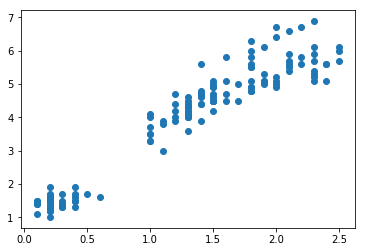

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.optimize import minimize_scalar, minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [2]:
def square_error(w1, w0=0):
    return (1/x.shape[0]) * np.sum((y-(w0+w1*x))**2)

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

In [3]:
square_error(-1,1)

21.907066666666672

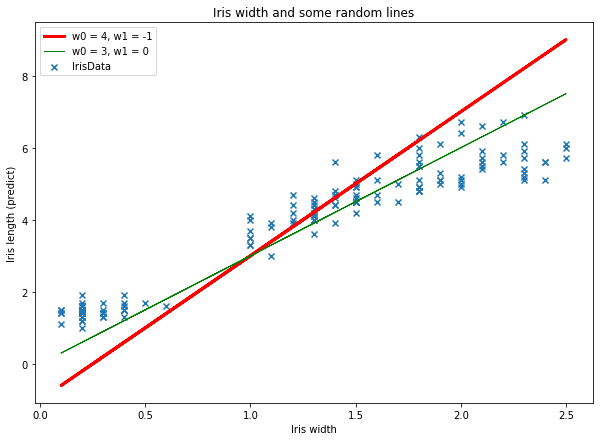

In [4]:
lineFunc = lambda x, w0, w1: w0 + w1 * x
plt.figure(figsize=(10,7))
plt.scatter(x, y, label = 'IrisData', marker = 'x')
plt.plot(x, lineFunc(x, -1, 4), label = 'w0 = 4, w1 = -1', color = 'red', linewidth=3)
plt.plot(x, lineFunc(x, 0, 3), label = 'w0 = 3, w1 = 0', color = 'green', linewidth=1)
plt.title('Iris width and some random lines')
plt.ylabel('Iris length (predict)')
plt.xlabel('Iris width')
plt.legend();

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

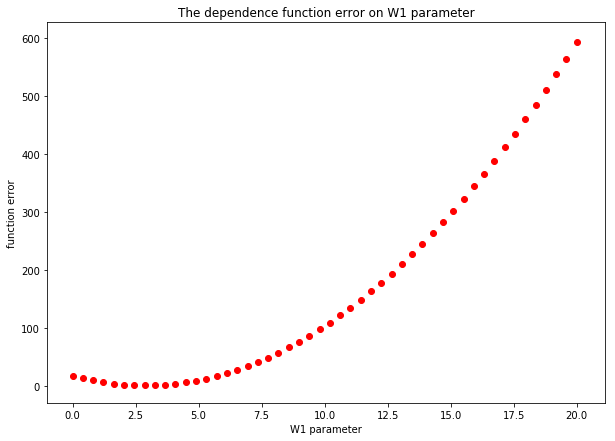

In [5]:
plt.figure(figsize=(10,7))
for point in np.linspace(0,20):
    plt.scatter(point, square_error(point, 0), color='red')
plt.xlabel('W1 parameter')
plt.ylabel('function error')
plt.title('The dependence function error on W1 parameter');
plt.show()

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [6]:
minim_res = minimize_scalar(square_error, bounds=[-20, 20], method='bounded').x

In [7]:
# The value of minimized parameter W1
minim_res

2.874706446598088

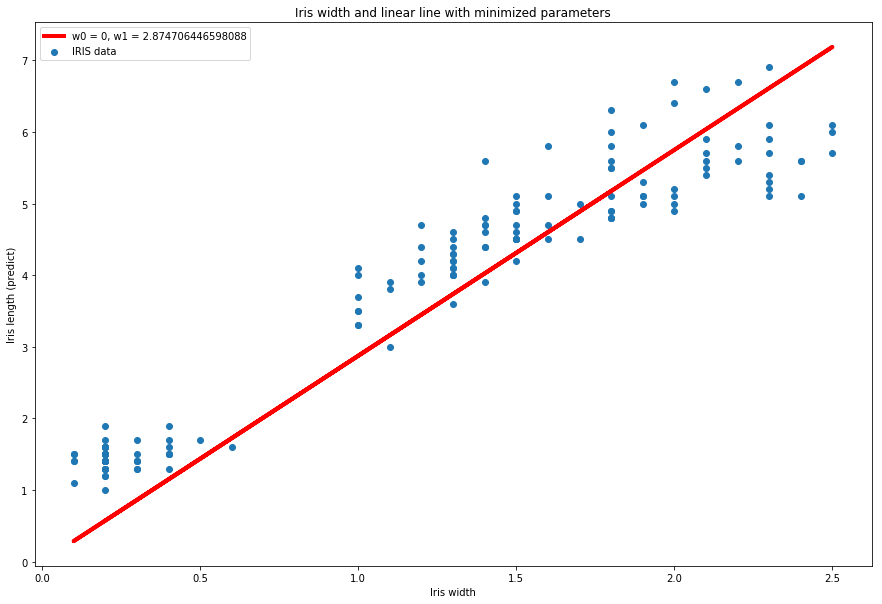

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(x, y, label = 'IRIS data')
plt.plot(x, lineFunc(x, 0, minim_res), label = 'w0 = 0, w1 = '+ str(minim_res), color = 'red', linewidth=4)
plt.title('Iris width and linear line with minimized parameters')
plt.ylabel('Iris length (predict)')
plt.xlabel('Iris width')
plt.legend();

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [9]:
from mpl_toolkits.mplot3d import Axes3D

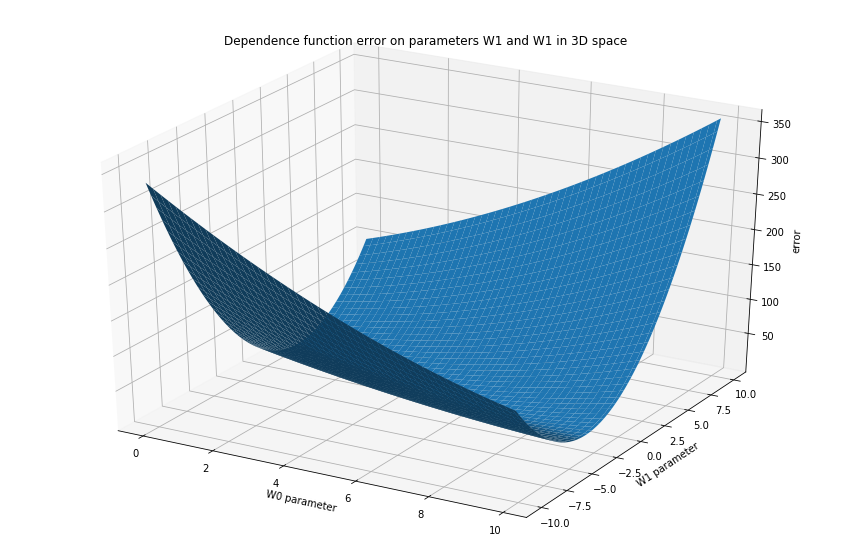

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

w0 = np.arange(0, 10, 0.1)
w1 = np.arange(-10, 10, 0.1)
W0,W1 = np.meshgrid(w0,w1) 
error_list= []
for i in range(0,W0.shape[0]):
    for j in range(0,W0.shape[1]):               
        error_list.append(square_error(W1[i,j], W0[i,j]))
surf = ax.plot_surface(W0, W1, np.array(error_list).reshape(W0.shape))
ax.set_title('Dependence function error on parameters W1 and W1 in 3D space')
ax.set_xlabel('W0 parameter')
ax.set_ylabel('W1 parameter')
ax.set_zlabel('error')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

In [11]:
def square_error_array(W): 
    return (1/x.shape[0]) * np.sum((y - (W[0] + W[1] * x))**2)
er_min = minimize(square_error_array, [0,0]).x

In [12]:
er_min

array([1.08355804, 2.22994049])

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

## Analytical solution

В линейной алгебре QR-разложение (QR-факторизация) матрицы – это разложение матрицы A на произведение $$A = QR$$ ортогональной матрицы $$ Q (Q^T Q=QQ^T=I)$$ и верхней треугольной матрицы R.

QR-разложение часто используется для решения линейных задач наименьших квадратов.
Для нахождения искомых переменных прежде всего необходимо получить матрицы Q и R, где $$A = QR$$, затем вычислить произведение $$d=Q^T y$$, и решить $$R\beta=d$$, а если записать в одно уравнение, то:
$$\beta=R^{-1} Q^T y$$

In [13]:
import scipy as sp

In [14]:
def ls_qr(A,b):
    Q, R = sp.linalg.qr(A, mode='economic')
    return sp.linalg.solve_triangular(R, Q.T @ b)

In [15]:
X = list()
for n in range(len(x)): 
    X.append((1,x[n]))

In [16]:
coeffs_qr = ls_qr(X, np.array(y).T)
coeffs_qr

array([1.08355803, 2.2299405 ])

$$W = (X^T A X)^{-1} X^T A y$$

In [17]:
X = np.matrix(X)
y= np.matrix(y)
mls_coef = np.linalg.inv(X.T * X) * X.T * y.T
mls_coef

matrix([[1.08355803],
        [2.2299405 ]])

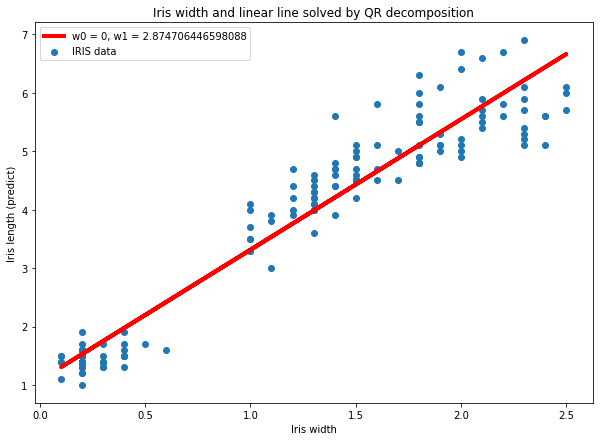

In [19]:
y = np.array(y)
plt.figure(figsize=(10,7))
plt.scatter(x, y, label = 'IRIS data')
plt.plot(x, lineFunc(x, coeffs_qr[0], coeffs_qr[1]), label = 'w0 = 0, w1 = '+ str(minim_res), color = 'red', linewidth=4)
plt.title('Iris width and linear line solved by QR decomposition')
plt.ylabel('Iris length (predict)')
plt.xlabel('Iris width')
plt.legend();